# DSA Competition

## Submission by:
### Group 18
#### Members: 
- Amal V Nair
- Aruna Chandran
- Vyshakh Krishnan

#### Domain:
- Elections

Dataset : 2019 Indian Lok Sabha Elections

### Objectives:
- Perform General Analysis and draw inference
- Predict winner using suitable classificaion model

### Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Reading the dataset into python

In [67]:
df = pd.read_csv('Data/Lok_sabha_2019.csv')
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


## 1.Preprocessing

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

### Handling Missing Values

In [69]:
df.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [70]:
df.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [71]:
df.loc[df['NAME'] == 'NOTA']

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
14,Gujarat,AHMEDABAD WEST,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14580,139,14719,0.895688,1.473030,1643317
39,West Bengal,ALIPURDUARS,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21147,28,21175,1.284592,1.533114,1648383
46,Uttarakhand,ALMORA,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15311,194,15505,1.158985,2.215611,1337808
54,Andhra Pradesh,AMALAPURAM,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16427,41,16468,1.128288,1.333044,1459556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Tamil Nadu,VIRUDHUNAGAR,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17087,205,17292,1.165028,1.607174,1484256
2230,Andhra Pradesh,VISAKHAPATNAM,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16626,20,16646,0.909966,1.342505,1829300
2235,Andhra Pradesh,VIZIANAGARAM,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29468,33,29501,1.961529,2.413302,1503980
2241,Telangana,WARANGAL,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18764,37,18801,1.127990,1.770886,1666770


### Insights:
- The dataset contains 19 features and 2263 rows
- Most columns are categorical and several contain null values
- On further analysis the 'NOTA' column is contributing to null values

In [72]:
df.loc[df['NAME'] == 'NOTA']['OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'].describe()

count    245.000000
mean       1.627031
std        0.690592
min        1.000689
25%        1.189109
50%        1.391887
75%        1.762612
max        5.034813
Name: OVER TOTAL VOTES POLLED \nIN CONSTITUENCY, dtype: float64

In [73]:
df.loc[df['NAME'] == 'NOTA']['OVER TOTAL ELECTORS \nIN CONSTITUENCY'].describe()

count    245.000000
mean       1.105566
std        0.444233
min        0.529958
25%        0.855876
50%        0.988637
75%        1.225270
max        3.305526
Name: OVER TOTAL ELECTORS \nIN CONSTITUENCY, dtype: float64

- Overall only 1% of voters voted for NOTA
- In each constituency, the average vote percent of NOTA is around 1%
- Since NOTA is not a person and there is no reliable way to fill values such as age, gender, education, asset, etc, it seems better to remove NOTA from analysis.

In [74]:
df.dropna(inplace=True)

In [75]:
df.isnull().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                       0
GENDER                                       0
CRIMINAL\nCASES                              0
AGE                                          0
CATEGORY                                     0
EDUCATION                                    0
ASSETS                                       0
LIABILITIES                                  0
GENERAL\nVOTES                               0
POSTAL\nVOTES                                0
TOTAL\nVOTES                                 0
OVER TOTAL ELECTORS \nIN CONSTITUENCY        0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    0
TOTAL ELECTORS                               0
dtype: int64

#### Renaming columns

In [76]:
df.rename(columns={'CRIMINAL\nCASES': 'CRIMINAL CASES', 'GENERAL\nVOTES': 'GENERAL VOTES', 
                'POSTAL\nVOTES': 'POSTAL VOTES', 'TOTAL\nVOTES': 'TOTAL VOTES', 
                  'OVER TOTAL ELECTORS \nIN CONSTITUENCY': 'PERCENT OF ELECTORS',
                  'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY': 'PERCENT OF TOTAL VOTES'}, inplace=True)

In [77]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES',
       'PERCENT OF ELECTORS', 'PERCENT OF TOTAL VOTES', 'TOTAL ELECTORS'],
      dtype='object')

In [78]:
df.rename(str.lower, axis='columns', inplace=True)

In [79]:
df.columns

Index(['state', 'constituency', 'name', 'winner', 'party', 'symbol', 'gender',
       'criminal cases', 'age', 'category', 'education', 'assets',
       'liabilities', 'general votes', 'postal votes', 'total votes',
       'percent of electors', 'percent of total votes', 'total electors'],
      dtype='object')

In [80]:
df.select_dtypes(include='object').columns

Index(['state', 'constituency', 'name', 'party', 'symbol', 'gender',
       'criminal cases', 'category', 'education', 'assets', 'liabilities'],
      dtype='object')

### Cleaning other columns

In [81]:
def cleaning(data):
    not_number = []
    for value in data:
        try:
            float(value)
        except ValueError:
            if value in not_number:
                continue
            else:
                not_number.append(value)
    return not_number

In [82]:
list_1 = cleaning(df['criminal cases'])
print(list_1)

['Not Available']


In [83]:
df['assets'] = df['assets'].str.split('\n').str[0]
df['liabilities'] = df['liabilities'].str.split('\n').str[0]
df['assets'] = df['assets'].str.lstrip('Rs').str.replace(',','')
df['liabilities'] = df['liabilities'].str.lstrip('Rs').str.replace(',','')
df[['assets', 'liabilities']].head()

,assets,liabilities
0,3099414,231450
1,18477888,847000
2,36491000,15300000
4,74274036,8606522
5,133784385,22251891


In [84]:
list_2 = cleaning(df['assets'])
list_3 = cleaning(df['liabilities'])
print(list_2)
print(list_3)

['Nil', 'Not Available', '`']
['NIL', 'Not Available']


In [85]:
df['criminal cases'] = df['criminal cases'].replace(list_1, 0)
df['assets'] = df['assets'].replace(list_2, 0)
df['liabilities'] = df['liabilities'].replace(list_3, 0)

In [86]:
df['criminal cases'] = pd.to_numeric(df['criminal cases'])
df['assets'] = pd.to_numeric(df['assets'])
df['liabilities'] = pd.to_numeric(df['liabilities'])

In [87]:
print(df['criminal cases'].dtype)
print(df['assets'].dtype)
print(df['liabilities'].dtype)

int64
int64
int64


In [88]:
df.replace({'education': {'Not Available': 'Others', 'Post Graduate\n': 'Post Graduate', 'Graduate Professional': 'Graduate'}}, inplace = True)

In [89]:
df.education.value_counts()

Graduate         777
Post Graduate    503
12th Pass        256
10th Pass        196
8th Pass          78
Doctorate         73
Others            72
Literate          30
5th Pass          28
Illiterate         5
Name: education, dtype: int64

#### Writing the cleaned data to a new CSV file

In [90]:
#df.to_csv('cleaned_election.csv', index=False)

In [91]:
df.head(3)

,state,constituency,name,winner,party,symbol,gender,criminal cases,age,category,education,assets,liabilities,general votes,postal votes,total votes,percent of electors,percent of total votes,total electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790


### Encoding

#### Label encoding gender column

In [93]:
le = LabelEncoder()

In [94]:
df['gender'] = le.fit_transform(df['gender'])
df['gender'].value_counts()

1    1760
0     258
Name: gender, dtype: int64

#### One-hot encoding

In [95]:
df = pd.get_dummies(data=df, columns=['party', 'state', 'category', 'constituency'])
df.head()

,name,winner,symbol,gender,criminal cases,age,education,assets,liabilities,general votes,...,constituency_VILUPPURAM,constituency_VIRUDHUNAGAR,constituency_VISAKHAPATNAM,constituency_VIZIANAGARAM,constituency_WARANGAL,constituency_WARDHA,constituency_WAYANAD,constituency_WEST DELHI,constituency_YAVATMAL-WASHIM,constituency_ZAHIRABAD
0,SOYAM BAPU RAO,1,Lotus,1,52,52.0,12th Pass,3099414,231450,376892,...,0,0,0,0,0,0,0,0,0,0
1,Godam Nagesh,0,Car,1,0,54.0,Post Graduate,18477888,847000,318665,...,0,0,0,0,0,0,0,0,0,0
2,RATHOD RAMESH,0,Hand,1,3,52.0,12th Pass,36491000,15300000,314057,...,0,0,0,0,0,0,0,0,0,0
4,Satyapal Singh Baghel,1,Lotus,1,5,58.0,Doctorate,74274036,8606522,644459,...,0,0,0,0,0,0,0,0,0,0
5,Manoj Kumar Soni,0,Elephant,1,0,47.0,Post Graduate,133784385,22251891,434199,...,0,0,0,0,0,0,0,0,0,0


#### Ordinal encoding

In [96]:
edu_dict = {'Illiterate': 0, 'Literate': 1, '5th Pass': 2, '8th Pass': 3, '10th Pass': 4, 
 'Others': 5, '12th Pass': 6, 'Graduate': 7, 'Post Graduate': 8, 'Doctorate': 9}

In [97]:
df.replace({'education': edu_dict}, inplace=True)
df['education'].value_counts()

7    777
8    503
6    256
4    196
3     78
9     73
5     72
1     30
2     28
0      5
Name: education, dtype: int64

### Removing unnecessary features

In [98]:
df.drop(columns=['name', 'symbol'], axis=1, inplace=True)
df.head()

,winner,gender,criminal cases,age,education,assets,liabilities,general votes,postal votes,total votes,...,constituency_VILUPPURAM,constituency_VIRUDHUNAGAR,constituency_VISAKHAPATNAM,constituency_VIZIANAGARAM,constituency_WARANGAL,constituency_WARDHA,constituency_WAYANAD,constituency_WEST DELHI,constituency_YAVATMAL-WASHIM,constituency_ZAHIRABAD
0,1,1,52,52.0,6,3099414,231450,376892,482,377374,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,54.0,8,18477888,847000,318665,149,318814,...,0,0,0,0,0,0,0,0,0,0
2,0,1,3,52.0,6,36491000,15300000,314057,181,314238,...,0,0,0,0,0,0,0,0,0,0
4,1,1,5,58.0,9,74274036,8606522,644459,2416,646875,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,47.0,8,133784385,22251891,434199,1130,435329,...,0,0,0,0,0,0,0,0,0,0


### Adding new feature

In [99]:
df['balance assets'] = df['assets'] - df['liabilities']
df.head()

,winner,gender,criminal cases,age,education,assets,liabilities,general votes,postal votes,total votes,...,constituency_VIRUDHUNAGAR,constituency_VISAKHAPATNAM,constituency_VIZIANAGARAM,constituency_WARANGAL,constituency_WARDHA,constituency_WAYANAD,constituency_WEST DELHI,constituency_YAVATMAL-WASHIM,constituency_ZAHIRABAD,balance assets
0,1,1,52,52.0,6,3099414,231450,376892,482,377374,...,0,0,0,0,0,0,0,0,0,2867964
1,0,1,0,54.0,8,18477888,847000,318665,149,318814,...,0,0,0,0,0,0,0,0,0,17630888
2,0,1,3,52.0,6,36491000,15300000,314057,181,314238,...,0,0,0,0,0,0,0,0,0,21191000
4,1,1,5,58.0,9,74274036,8606522,644459,2416,646875,...,0,0,0,0,0,0,0,0,0,65667514
5,0,1,0,47.0,8,133784385,22251891,434199,1130,435329,...,0,0,0,0,0,0,0,0,0,111532494


### Standard Scaling

In [100]:
columns_to_scale = ['criminal cases', 'age', 'assets',
       'liabilities', 'general votes', 'postal votes', 'total votes', 'percent of electors', 'percent of total votes', 'total electors', 'balance assets', 'education']
scalar = StandardScaler()
df[columns_to_scale] = scalar.fit_transform(df[columns_to_scale])
df[columns_to_scale].head()

,criminal cases,age,assets,liabilities,general votes,postal votes,total votes,percent of electors,percent of total votes,total electors,balance assets,education
0,6.620242,-0.023051,-0.311731,-0.218126,0.336701,-0.375171,0.332957,0.519660,0.451418,-0.538876,-0.295544,-0.293924
1,-0.190426,0.145491,-0.274420,-0.211243,0.107942,-0.575668,0.103781,0.255542,0.194212,-0.538876,-0.255507,0.878286
2,0.202498,-0.023051,-0.230717,-0.049632,0.089838,-0.556401,0.085873,0.234903,0.174113,-0.538876,-0.245853,-0.293924
4,0.464446,0.482577,-0.139047,-0.124477,1.387908,0.789278,1.387657,1.060773,1.432617,0.876978,-0.125235,1.464391
5,-0.190426,-0.444408,0.005336,0.028103,0.561847,0.014986,0.559766,0.327201,0.569691,0.876978,-0.000851,0.878286


## 2. Exploratory data analysis

Using cleaned unscaled data

In [4]:
df2 = pd.read_csv('cleaned_election.csv')
df2.head()

,state,constituency,name,winner,party,symbol,gender,criminal cases,age,category,education,assets,liabilities,general votes,postal votes,total votes,percent of electors,percent of total votes,total electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690


### Age distribution of candidates

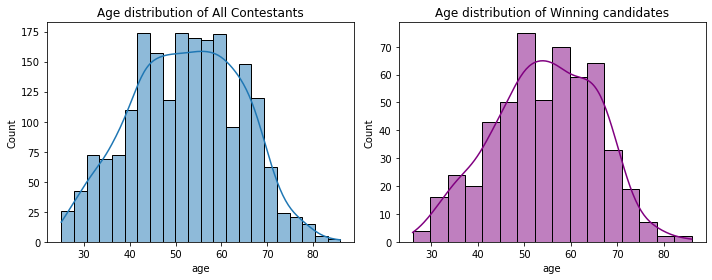

In [5]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df2, x='age', kde=True)
plt.title("Age distribution of All Contestants")

plt.subplot(1, 2, 2)
sns.histplot(data=df2.loc[df2['winner'] == 1], x = 'age', kde=True, color='purple')
plt.title("Age distribution of Winning candidates")

plt.tight_layout()

#### Insights:
- From the graph we can infer that the majority candidates are in the age group of 45 - 65
- Although India has a huge population of youngsters, very few compete
- The winners are also from the senior age group
- The country seems to prefer experienced candidates

In [6]:
winners = df2.loc[df2['winner'] == 1]
winners_oldest = winners.sort_values('age', ascending=False).head(10)
winners_youngest = winners.sort_values('age', ascending=True).head(10)

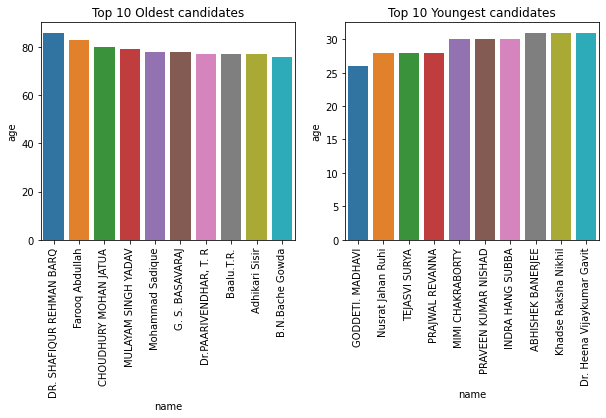

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(data=winners_oldest, x='name', y='age')
plt.xticks(rotation=90)
plt.title("Top 10 Oldest candidates")

plt.subplot(1, 2, 2)
sns.barplot(data=winners_youngest, x='name', y='age')
plt.xticks(rotation=90)
plt.title("Top 10 Youngest candidates")

plt.show()

### Education status of candidates

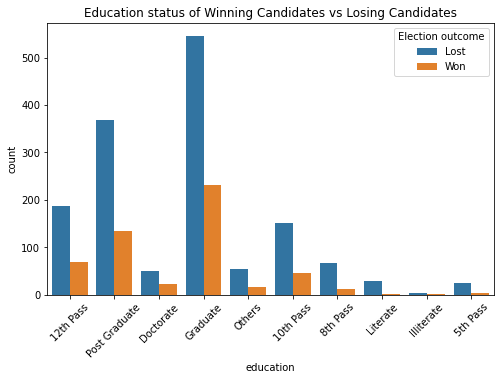

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='education', data=df2, hue='winner')
plt.title("Education status of Winning Candidates vs Losing Candidates")
plt.legend(title='Election outcome', labels=['Lost', 'Won'])
plt.xticks(rotation=45)
plt.show()

#### Insights:
- Majority of the candidates are either graduates or postgraduates
- The same is true for winners also
- This dispels the long held notion that politicians are generally illeterate

### Gender-wise distribution of contestants

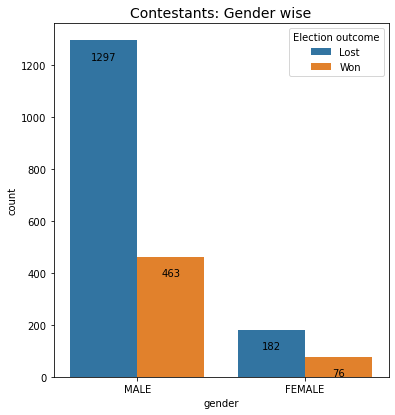

In [14]:
plt.figure(figsize=(6, 6.5))
graph_1 = sns.countplot(x = 'gender', hue = 'winner', data = df2, )
rects = graph_1.patches
for bar in rects:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    graph_1.annotate(f'\n{y_value}', (x_value, y_value), ha = 'center', va = 'top')
plt.title('Contestants: Gender wise', fontsize = 14)
plt.legend(title='Election outcome', labels=['Lost', 'Won'])
plt.show()

#### Insights:
- Only a small minority of the candidates(contesting & winning) are females
- Gender discrimination is still high in politics

### Criminal Cases - State wise & Party wise

In [40]:
criminal_state = df2.groupby('state')['criminal cases'].sum().sort_values(ascending = False).head(15)
criminal_state

state
Kerala            669
Uttar Pradesh     430
Bihar             312
West Bengal       303
Maharashtra       302
Telangana         195
Tamil Nadu        161
Odisha            105
Andhra Pradesh     81
Jharkhand          67
Madhya Pradesh     63
Karnataka          44
Gujarat            39
Rajasthan          30
Punjab             28
Name: criminal cases, dtype: int64

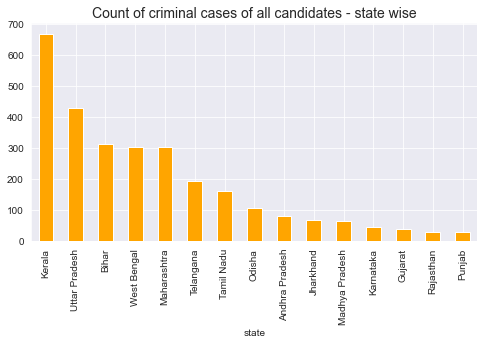

In [55]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
graph_2 = criminal_state.plot(kind='bar', color='orange')
plt.title("Count of criminal cases of all candidates - state wise", fontsize=14)
plt.show()

In [62]:
criminal_party = df2.groupby('party')['criminal cases'].sum().sort_values(ascending=False).head(15)

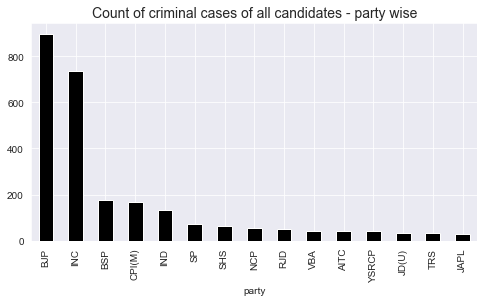

In [64]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
criminal_party.plot(kind='bar', color='black')
plt.title("Count of criminal cases of all candidates - party wise", fontsize=14)
plt.show()

## 3. Classification model

In [101]:
X = df.drop(columns='winner', axis = 1)
y = df['winner']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

### 1. Support Vector Machine

In [103]:
supp_vector = SVC()
svc_model = supp_vector.fit(X_train, y_train)

In [104]:
svc_predict = svc_model.predict(X_test)

In [105]:
confusion_matrix(svc_predict, y_test)

array([[282,   9],
       [ 14,  99]], dtype=int64)

In [106]:
print('SVC accuracy score is: ', round(accuracy_score(y_test, svc_predict)*100, 4))

SVC accuracy score is:  94.3069


### 2. Decision Tree Classifier

In [107]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

In [108]:
dt_predict = dt_model.predict(X_test)

In [109]:
confusion_matrix(y_test, dt_predict)

array([[275,  21],
       [ 12,  96]], dtype=int64)

In [110]:
print('Decision tree accuracy score is: ', round(accuracy_score(y_test, dt_predict)*100, 4))

Decision tree accuracy score is:  91.8317


### 3. Logistic Regression

In [111]:
log_reg = LogisticRegression()
lr_model = log_reg.fit(X_train, y_train)

In [112]:
lr_predict = lr_model.predict(X_test)

In [113]:
confusion_matrix(y_test, lr_predict)

array([[286,  10],
       [ 11,  97]], dtype=int64)

In [114]:
print('Logistic Regression accuracy score is: ', round(accuracy_score(y_test, lr_predict)*100, 4))

Logistic Regression accuracy score is:  94.802


### 4. K-Nearest Neighbor Classifier

In [115]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [116]:
knn_predict = knn_model.predict(X_test)

In [117]:
confusion_matrix(y_test, knn_predict)

array([[283,  13],
       [ 22,  86]], dtype=int64)

In [118]:
print('K Nearest Neighbor accuracy score is: ', round(accuracy_score(y_test, knn_predict)*100, 4))

K Nearest Neighbor accuracy score is:  91.3366


### 5. Random Forest Classifier

In [119]:
rand_forest = RandomForestClassifier()
rf_model = rand_forest.fit(X_train, y_train)

In [120]:
rf_predict = rf_model.predict(X_test)

In [121]:
confusion_matrix(y_test, rf_predict)

array([[288,   8],
       [ 11,  97]], dtype=int64)

In [122]:
print('Random Forest Classifier accuracy score is: ', round(accuracy_score(y_test, rf_predict)*100, 4))

Random Forest Classifier accuracy score is:  95.297


Based on five different classification model, random forest seems most suitable

## 4. Hyperparameter Tuning

Random Forest Parameters

In [123]:
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Grid Search Method

In [217]:
parameters ={'max_depth': [None, 20, 30, 40, 50],
'criterion' : ['gini', 'entropy'], 'max_features': [0.3,0.5,0.7,0.9],
'min_samples_split': [2,5,10], 'min_samples_leaf': [2,3,5,7,10,15],
'n_estimators': [12, 14, 19, 100]}

In [218]:
param_size = ParameterGrid(parameters)
len(param_size)

2880

There are 2880 possible parameter combination based on grid search

In [219]:
grid_search = RandomForestClassifier()
grid_search = GridSearchCV(grid_search, parameters, cv=5, scoring='accuracy',n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
print('\nBest Params: ', grid_result.best_params_)
print('\nBest Score: ', grid_result.best_score_)


Best Params:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 0.9, 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 12}

Best Score:  0.9467107666865374


### Cross Validation - 10 fold

In [227]:
randomforest_classifier = RandomForestClassifier(criterion='entropy', max_depth=20, 
                                                max_features=0.9,min_samples_leaf=15, 
                                                min_samples_split=5, n_estimators=12)

score=cross_val_score(randomforest_classifier,X,y,cv=10)
print('\n')
print('% Accuracy :', round(score.mean()*100,4), '\n%Standard Deviation: ', round(score.std() * 100, 4))



% Accuracy : 94.55 
%Standard Deviation:  1.6695


### Conclusion:
- After extensive hyperparameter tuning and cross validation, we were able to come up with a model having mean accuracy of 94.55% with a standard deviation of 1.67%.
- Since the dataset contains several categorical features, further addition of features via feature engineering might improve the model.